## Ajuste de curvas: emision CO2
**Integrantes**


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import optimize as opt

In [2]:
data = pd.read_csv("annual-co2-emissions-per-country.csv")
data

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,0.014656
1,Afghanistan,AFG,1950,0.084272
2,Afghanistan,AFG,1951,0.091600
3,Afghanistan,AFG,1952,0.091600
4,Afghanistan,AFG,1953,0.106256
...,...,...,...,...
23165,Zimbabwe,ZWE,2015,12.170460
23166,Zimbabwe,ZWE,2016,10.814761
23167,Zimbabwe,ZWE,2017,10.246841
23168,Zimbabwe,ZWE,2018,11.340575


In [3]:
# Aqui se agregan los codigos de paises para analizar
Code = ['USA', 'MEX', 'DEU']
#Code = ['USA']

In [4]:
def retrieve_data(Code):
    country_data = []
    for i in range(len(Code)):
        country_data.append(pd.DataFrame(data[data['Code'] == Code[i]].values, columns = ['Entity', 'Code', 'Year', 'Annual CO2 emissions']))
    return country_data

In [5]:
country_data = retrieve_data(Code)

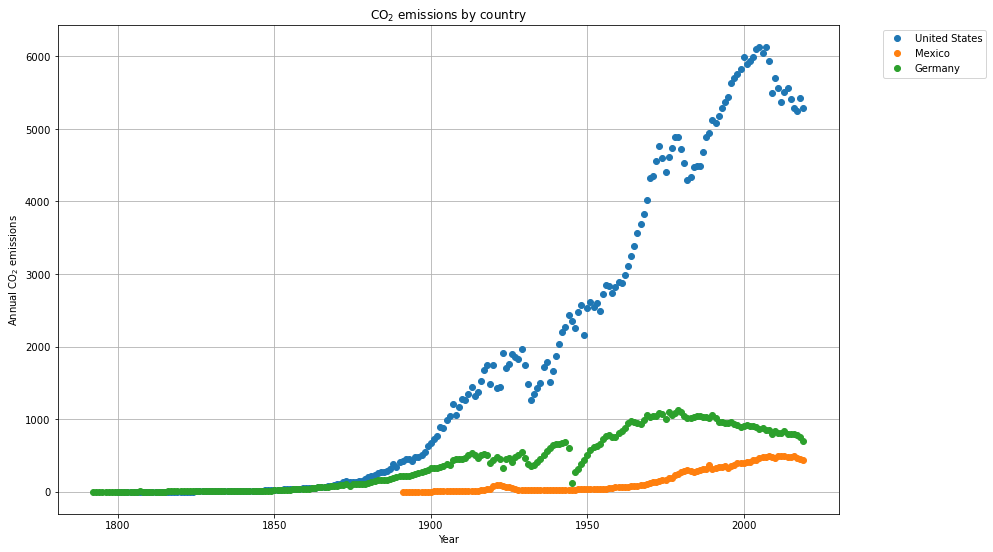

In [7]:
plt.figure(figsize=(14,9))
for i in range(len(Code)):
    plt.plot(country_data[i]['Year'], country_data[i]['Annual CO2 emissions'], 'o', label=country_data[i]['Entity'][0])
    
plt.xlabel('Year')
plt.ylabel('Annual CO$ _2$ emissions')
plt.title('CO$ _2$ emissions by country')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [8]:
def min_sq_nr(beta, x, y, N, l):
    n = len(x)
    poli = np.array([beta[i] * x**i for i in range(N + 1)]).sum(axis=0)
    return (1 / (2 * n)) * ((y - poli)**2).sum() + l * np.linalg.norm(beta)**2

In [9]:
L = 0.0001

In [10]:
error = []

for i in range(1, 6):
    beta_ini = np.zeros(i + 1)
    solucion = opt.minimize(fun=min_sq_nr, 
                            x0=beta_ini, 
                            args=(country_data[0]['Year'], country_data[0]['Annual CO2 emissions'], i, L))
    error.append(solucion.fun)

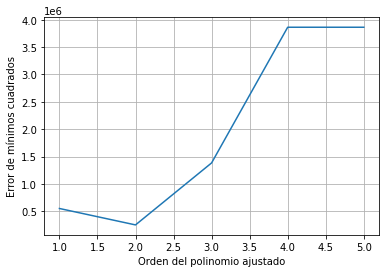

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error de mínimos cuadrados')
plt.grid()

In [12]:
poli = np.argmin(error) + 1
solucion = opt.minimize(fun=min_sq_nr,
                        x0=np.zeros(poli + 1),
                        args=(country_data[0]['Year'], country_data[0]['Annual CO2 emissions'], poli, L))
beta_nr = solucion.x

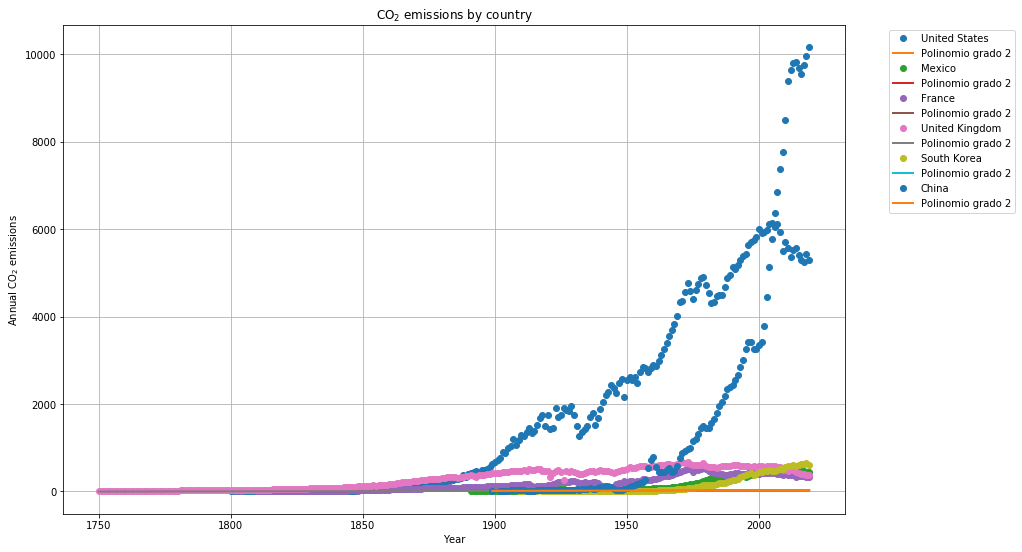

In [57]:
plt.figure(figsize=(14,9))
for i in range(len(Code)):
    plt.plot(country_data[i]['Year'], country_data[i]['Annual CO2 emissions'], 'o', label=country_data[i]['Entity'][0])
    x_num = np.linspace(min(country_data[i]['Year']), max(country_data[i]['Year']))
    y_fit = np.array([beta_nr[j] * x_num**j for j in range(poli + 1)]).sum(axis=0)
    plt.plot(x_num, y_fit, lw=2, label=f'Polinomio grado {poli}')
    
plt.xlabel('Year')
plt.ylabel('Annual CO$ _2$ emissions')
plt.title('CO$ _2$ emissions by country')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')